<a href="https://colab.research.google.com/github/Mukeshreddy3699/INFO5810/blob/main/extracredit3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

In [ ]:
# Load the bread basket dataset
bread_df = pd.read_csv("/content/bread_basket (1).csv")

#Shape of dataset
print("Shape of dataset:", bread_df.shape)

#Variables and data types
print(" Variables and Data Types:")
print(bread_df.dtypes)


Shape of dataset: (20507, 6)
 Variables and Data Types:
Transaction         int64
Item               object
date_time          object
time               object
period_day         object
weekday_weekend    object
dtype: object


In [ ]:
most_freq_day = bread_df['period_day'].mode()[0]
count_most_freq = bread_df['period_day'].value_counts().iloc[0]
print(f"Most frequent element in period_day: {most_freq_day} ({count_most_freq} occurrences)")


Most frequent element in period_day: afternoon (11569 occurrences)


In [ ]:
day_counts = bread_df['period_day'].value_counts()
day_fraction = bread_df['period_day'].value_counts(normalize=True)
period_day_summary = pd.DataFrame({'Count': day_counts, 'Fraction': day_fraction})
print("Period_day Summary:\n", period_day_summary)


Period_day Summary:
             Count  Fraction
period_day                 
afternoon   11569  0.564149
morning      8404  0.409811
evening       520  0.025357
night          14  0.000683


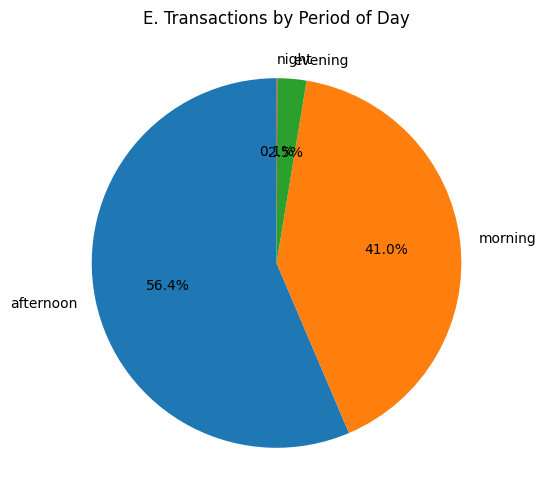


Interpretation: The pie chart shows which time of day has the highest number of transactions.


In [ ]:
plt.figure(figsize=(6,6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("E. Transactions by Period of Day")
plt.show()

print("Interpretation: The pie chart shows which time of day has the highest number of transactions.")


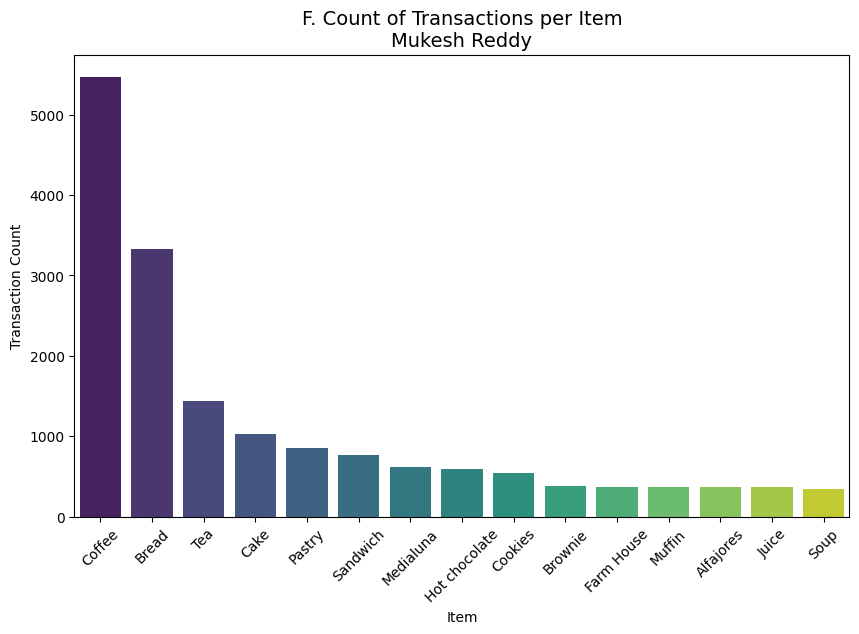

In [ ]:
item_counts = bread_df['Item'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=item_counts.index[:15], y=item_counts.values[:15], palette="viridis")
plt.xticks(rotation=45)
plt.title(" Count of Transactions per Item\nMukesh Reddy", fontsize=14)
plt.xlabel("Item")
plt.ylabel("Transaction Count")
plt.show()


In [ ]:
items_to_check = ['Coffee', 'Bread', 'Sandwich', 'Juice', 'Chicken Stew']
print("\nG. Transaction Count for Selected Items:")
for item in items_to_check:
    count = bread_df[bread_df['Item'] == item].shape[0]
    print(f"{item}: {count}")



G. Transaction Count for Selected Items:
Coffee: 5471
Bread: 3325
Sandwich: 771
Juice: 369
Chicken Stew: 123


In [ ]:
weekday_prop = bread_df[bread_df['weekday_weekend'] == 'Weekday'].shape[0] / bread_df.shape[0]
print(f"\nH. Proportion of Weekday Transactions: {weekday_prop:.2f}")



H. Proportion of Weekday Transactions: 0.00


Part B

In [ ]:
encoded_df = pd.read_excel("/content/encoded_transaction (1).xls")

# Convert all nonzero values to 1 (binary encoding)
encoded_df = encoded_df.applymap(lambda x: 1 if x > 0 else 0)

# Confirm only 0/1 values
print("Unique values check:", np.unique(encoded_df.values))

# Now run FP-Growth
from mlxtend.frequent_patterns import fpgrowth, association_rules

frequent_items_95 = fpgrowth(encoded_df, min_support=0.95, use_colnames=True)
frequent_items_20 = fpgrowth(encoded_df, min_support=0.20, use_colnames=True)

print("A. Frequent items (min_support = 0.95):", frequent_items_95.shape[0])
print("B. Frequent items (min_support = 0.20):", frequent_items_20.shape[0])


Unique values check: [0 1]
A. Frequent items (min_support = 0.95): 1
B. Frequent items (min_support = 0.20): 5


In [ ]:
rules = association_rules(frequent_items_20, metric="confidence", min_threshold=0.7)

# Filter to show only Bread, Coffee, Cake, Tea
filtered_rules = rules[rules['antecedents'].apply(lambda x: any(i in x for i in ['Bread','Coffee','Cake','Tea']))]

print("\nC/D. Association Rules (Filtered):")
display(filtered_rules[['antecedents','consequents','support','confidence','lift','conviction']])




C/D. Association Rules (Filtered):


,antecedents,consequents,support,confidence,lift,conviction
0,(Bread),(S/N),0.327100,0.999677,0.999783,0.327205
1,(Coffee),(S/N),0.478394,1.000000,1.000106,inf


In [ ]:
rule = filtered_rules[
    (filtered_rules['antecedents'] == {'Coffee','Cake'}) &
    (filtered_rules['consequents'] == {'Bread'})
]

if not rule.empty:
    s, c, l = rule['support'].values[0], rule['confidence'].values[0], rule['lift'].values[0]
    print(f"\nE. Interpretation of Rule {{Coffee, Cake}} → {{Bread}}")
    print(f"Support: {s:.3f}, Confidence: {c:.3f}, Lift: {l:.3f}")
    print("Interpretation: Customers who buy Coffee and Cake are highly likely to also buy Bread.")
else:
    print("Rule {Coffee, Cake} → {Bread} not found in filtered rules.")


Rule {Coffee, Cake} → {Bread} not found in filtered rules.


In [ ]:
import pandas as pd

df = pd.read_excel("Claimsdata (2).xlsx")
print(df.columns)


Index(['Year', 'Month', 'Period', 'Claims'], dtype='object')


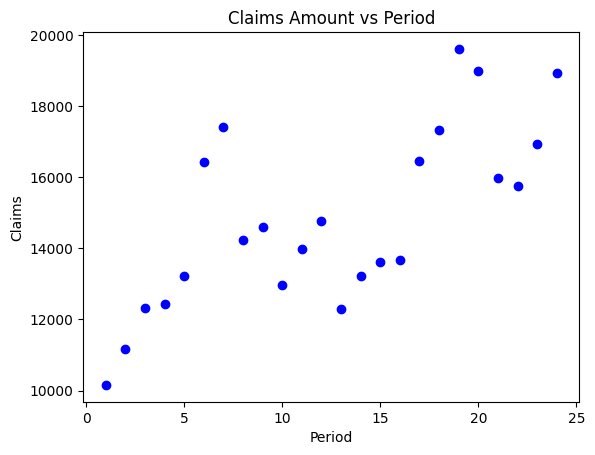

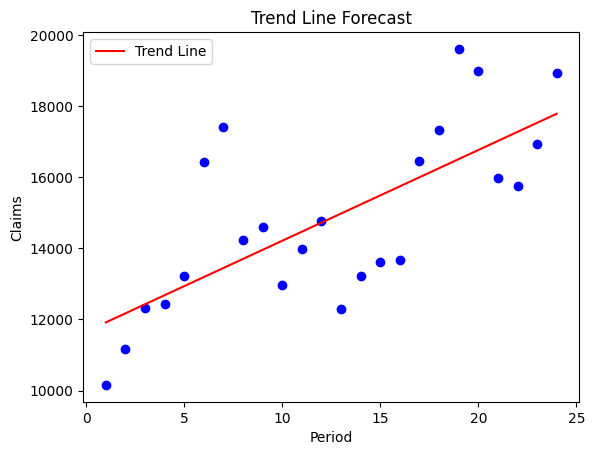

Equation: Claims = 11661.16 + 255.08*Period

Forecasted Claims for 2014 (Periods 25–30):
   Period  Forecasted_Claims
0      25       18038.086957
1      26       18293.163913
2      27       18548.240870
3      28       18803.317826
4      29       19058.394783
5      30       19313.471739


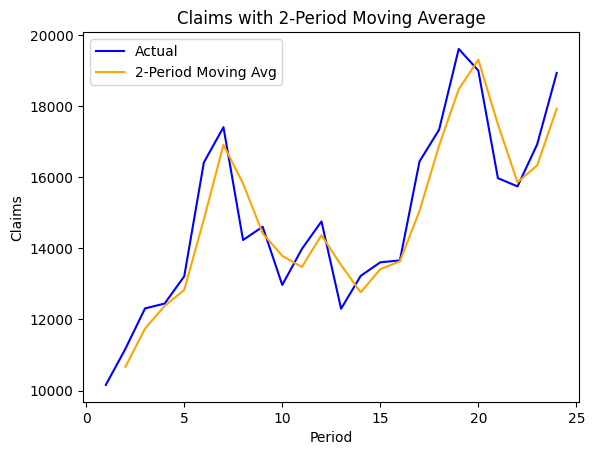


Predicted Claims for Periods 1–6 of 2014:
   Period  Predicted_Claims
0       1      11916.240000
1       2      12171.316957
2       3      12426.393913
3       4      12681.470870
4       5      12936.547826
5       6      13191.624783


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_excel("Claimsdata (2).xlsx")

# Convert Claims column to numeric (replace '--' or bad values with NaN)
df['Claims'] = pd.to_numeric(df['Claims'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['Claims'])

# A. Scatterplot
plt.scatter(df['Period'], df['Claims'], color='blue')
plt.title('Claims Amount vs Period')
plt.xlabel('Period')
plt.ylabel('Claims')
plt.show()

# B. Fit trend line + forecast next 6 periods
X = df[['Period']]
y = df['Claims']
model = LinearRegression().fit(X, y)

# Plot trend line
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red', label='Trend Line')
plt.title('Trend Line Forecast')
plt.xlabel('Period')
plt.ylabel('Claims')
plt.legend()
plt.show()

# Show equation
print(f"Equation: Claims = {model.intercept_:.2f} + {model.coef_[0]:.2f}*Period")

# Forecast for periods 25–30
future = pd.DataFrame({'Period': range(25, 31)})
future['Forecasted_Claims'] = model.predict(future)
print("\nForecasted Claims for 2014 (Periods 25–30):")
print(future)

# C. 2-period moving average
df['SMA2'] = df['Claims'].rolling(2).mean()
plt.plot(df['Period'], df['Claims'], label='Actual', color='blue')
plt.plot(df['Period'], df['SMA2'], label='2-Period Moving Avg', color='orange')
plt.title('Claims with 2-Period Moving Average')
plt.xlabel('Period')
plt.ylabel('Claims')
plt.legend()
plt.show()

# D. Predicted claims for periods 1–6
pred_1_6 = model.predict(pd.DataFrame({'Period': range(1, 7)}))
print("\nPredicted Claims for Periods 1–6 of 2014:")
print(pd.DataFrame({'Period': range(1, 7), 'Predicted_Claims': pred_1_6}))
